In [ ]:
#iRIS

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Carregar o dataset Iris
iris = load_iris()

# Criar DataFrame para as features (X) e Series para o target (y)
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.Series(data=iris.target)

# Dividir os dados: 70% para treino, 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

# --- 1. Decision Tree (Árvore de Decisão) ---
print("\n" + "="*40)
print("Resultados para Decision Tree")
print("="*40)

modelo_arvore = DecisionTreeClassifier(random_state=42)
modelo_arvore.fit(X_train, y_train)

# Fazer previsões
previsoes_arvore = modelo_arvore.predict(X_test)

# Avaliar o modelo
acuracia_arvore = accuracy_score(y_test, previsoes_arvore)
print(f"Acurácia: {acuracia_arvore * 100:.2f}%")
print("\nRelatório de Classificação:")
print(classification_report(y_test, previsoes_arvore, target_names=iris.target_names))


# --- 2. Random Forest ---
print("\n" + "="*40)
print("Resultados para Random Forest")
print("="*40)

# Criar a instância do modelo. n_estimators é o número de árvores na floresta.
modelo_floresta = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_floresta.fit(X_train, y_train)
previsoes_floresta = modelo_floresta.predict(X_test)
acuracia_floresta = accuracy_score(y_test, previsoes_floresta)
print(f"Acurácia: {acuracia_floresta * 100:.2f}%")
print("\nRelatório de Classificação:")
print(classification_report(y_test, previsoes_floresta, target_names=iris.target_names))


# --- 3. SVM (Support Vector Machine) ---
print("\n" + "="*40)
print("Resultados para SVM (Support Vector Machine)")
print("="*40)

# Criar a instância do modelo. O kernel pode ser 'linear', 'rbf', 'poly', etc.
modelo_svm = SVC(kernel='linear', random_state=42)
modelo_svm.fit(X_train, y_train)
previsoes_svm = modelo_svm.predict(X_test)
acuracia_svm = accuracy_score(y_test, previsoes_svm)
print(f"Acurácia: {acuracia_svm * 100:.2f}%")
print("\nRelatório de Classificação:")
print(classification_report(y_test, previsoes_svm, target_names=iris.target_names))

In [ ]:
#mushroom

import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Caminho para o CSV pré-processado (já com odor one-hot)
csv_path = 'mushroom_s1_odor_ohe(in).csv'
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"Arquivo não encontrado: {csv_path}. Faça upload do '{csv_path}' no diretório de execução.")

# Carregar dataset
df = pd.read_csv(csv_path)

# Separar X e y (assume coluna 'class' presente)
X = df.drop('class', axis=1)
y = df['class']

# Codificar rótulos da classe ('e'/'p' -> 0/1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Divisão treino/teste (estratificada)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"Treino: {len(X_train)} amostras — Teste: {len(X_test)} amostras")

# Função para analisar modelo e salvar matriz de confusão
def analisar_modelo(nome, y_true, y_pred, classes=le.classes_):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nModelo: {nome}")
    print(f"Acurácia: {acc:.4f}")
    print("Matriz de Confusão:")
    print(cm)
    if cm.size == 4:
        tn, fp, fn, tp = cm.ravel()
        print(f"TP (venenoso corretamente): {tp}")
        print(f"FP (comestível→venenoso): {fp}")
        print(f"TN (comestível corretamente): {tn}")
        print(f"FN (venenoso→comestível): {fn}")
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Classe Predita')
    plt.ylabel('Classe Real')
    plt.title(f'Matriz de Confusão — {nome}')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{nome.replace(" ", "_")}.png')
    plt.close()

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
analisar_modelo('Decision Tree', y_test, y_pred_dt)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
analisar_modelo('Random Forest', y_test, y_pred_rf)

# SVM (parâmetros simples; GridSearchCV opcional)
svm = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
analisar_modelo('SVM', y_test, y_pred_svm)

print("\nMatrizes de confusão salvas como PNG no diretório atual.")


In [2]:
# ==============================================================================
# ETAPA 1: INSTALAÇÃO E IMPORTAÇÃO DAS BIBLIOTECAS
# ==============================================================================
# Instala a biblioteca oficial do repositório UCI.
# O '!' no início executa o comando no terminal do Colab.
!pip install ucimlrepo -q

import pandas as pd
import numpy as np
import joblib
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# ==============================================================================
# ETAPA 2: CARREGAMENTO AUTOMÁTICO DOS DADOS VIA BIBLIOTECA
# ==============================================================================

print("Buscando e carregando o dataset via ucimlrepo...")
try:
    dataset = fetch_ucirepo(id=426)
    X = dataset.data.features
    y_df = dataset.data.targets
    print("✅ Dados de Autismo carregados com sucesso.")
    print(f"Formato das Features (X): {X.shape}")
    print(f"Formato do Alvo (y): {y_df.shape}")
except Exception as e:
    print(f"❌ Erro ao buscar os dados: {e}")
    X = None
if X is not None:

    # ==============================================================================
    # ETAPA 3: PREPARAÇÃO DAS VARIÁVEIS
    # ==============================================================================

    # Padroniza os nomes das colunas de features para minúsculas
    X.columns = X.columns.str.strip().str.lower()

    # Converte a coluna alvo de 'YES'/'NO' para o formato numérico 1/0
    y = y_df.iloc[:, 0].str.strip().str.upper().map({'YES': 1, 'NO': 0})

    print("\n✅ Variáveis X e y preparadas.")

    # --- Transformações Manuais em X ---
    # Convertendo colunas de texto ('yes'/'no', 'm'/'f') para números
    for col in ['jundice', 'austim', 'used_app_before']:
        if col in X.columns:
            X[col] = X[col].map({'yes': 1, 'no': 0})

    if 'gender' in X.columns:
        X['gender'] = X['gender'].map({'m': 1, 'f': 0})

    if 'age' in X.columns:
        X['age'] = pd.to_numeric(X['age'], errors='coerce')

    print("✅ Mapeamento manual de colunas concluído.")

    # ==============================================================================
    # ETAPA 4: CRIAÇÃO DO PIPELINE DE PRÉ-PROCESSAMENTO
    # ==============================================================================

    numeric_features = X.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    print(f"\nColunas numéricas identificadas: {len(numeric_features)}")
    print(f"Colunas categóricas identificadas: {len(categorical_features)}")

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

    print("✅ Pipeline de pré-processamento criado.")

    # ==============================================================================
    # ETAPA 5: TREINAMENTO E AVALIAÇÃO DOS MODELOS
    # ==============================================================================

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    models_to_test = {
        'RandomForest': (RandomForestClassifier(random_state=42), {'model__n_estimators': [100, 200], 'model__max_depth': [10, None]}),
        'SVM': (SVC(random_state=42, probability=True), {'model__C': [1, 10], 'model__kernel': ['rbf']}),
        'DecisionTree': (DecisionTreeClassifier(random_state=42), {'model__max_depth': [5, 10, None]})
    }

    results = {}
    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for name, (model, params) in models_to_test.items():
        print(f"\n--- Treinando modelo: {name} ---")
        full_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        grid_search = GridSearchCV(full_pipeline, params, cv=cv_strategy, scoring='accuracy', n_jobs=-1, verbose=0)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = {'accuracy': accuracy, 'best_params': grid_search.best_params_, 'pipeline': best_model}
        print(f"Acurácia de {name}: {accuracy:.4f}")

    # ==============================================================================
    # ETAPA 6: RESULTADO FINAL E SALVAMENTO DO MELHOR MODELO
    # ==============================================================================

    best_model_name = max(results, key=lambda name: results[name]['accuracy'])
    best_pipeline = results[best_model_name]['pipeline']
    best_accuracy = results[best_model_name]['accuracy']

    print("\n--- Resumo Final do Treinamento ---")
    print(f"🏆 Melhor modelo: {best_model_name} com acurácia de {best_accuracy:.4f}")

    model_filename = 'melhor_modelo_autismo.joblib'
    joblib.dump(best_pipeline, model_filename)

    print(f"\n✅ Pipeline do melhor modelo ('{best_model_name}') salvo em: {model_filename}")

Buscando e carregando o dataset via ucimlrepo...
✅ Dados de Autismo carregados com sucesso.
Formato das Features (X): (704, 20)
Formato do Alvo (y): (704, 1)

✅ Variáveis X e y preparadas.
✅ Mapeamento manual de colunas concluído.

Colunas numéricas identificadas: 14
Colunas categóricas identificadas: 6
✅ Pipeline de pré-processamento criado.

--- Treinando modelo: RandomForest ---


/tmp/ipython-input-1980870048.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].map({'yes': 1, 'no': 0})
/tmp/ipython-input-1980870048.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = X['gender'].map({'m': 1, 'f': 0})
/tmp/ipython-input-1980870048.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Acurácia de RandomForest: 1.0000

--- Treinando modelo: SVM ---
Acurácia de SVM: 1.0000

--- Treinando modelo: DecisionTree ---
Acurácia de DecisionTree: 1.0000

--- Resumo Final do Treinamento ---
🏆 Melhor modelo: RandomForest com acurácia de 1.0000

✅ Pipeline do melhor modelo ('RandomForest') salvo em: melhor_modelo_autismo.joblib


--- Avaliando Modelo: Random Forest ---
Acurácia: 0.9649

Relatório de Classificação:
              precision    recall  f1-score   support

     Benigno       0.95      1.00      0.97        72
     Maligno       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



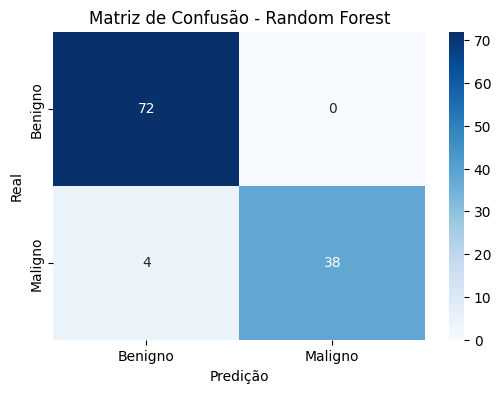

--------------------------------------------------

--- Avaliando Modelo: SVM (Support Vector Machine) ---
Acurácia: 0.9649

Relatório de Classificação:
              precision    recall  f1-score   support

     Benigno       0.95      1.00      0.97        72
     Maligno       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



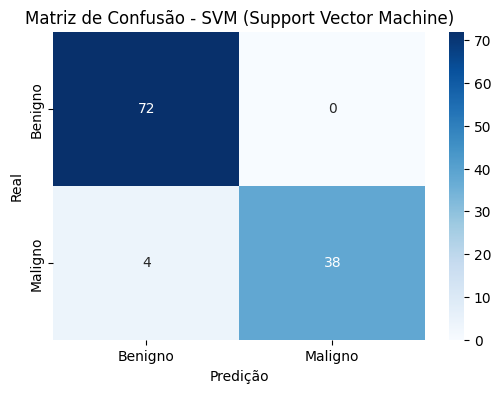

--------------------------------------------------

--- Avaliando Modelo: Decision Tree (Árvore de Decisão) ---
Acurácia: 0.9298

Relatório de Classificação:
              precision    recall  f1-score   support

     Benigno       0.94      0.94      0.94        72
     Maligno       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



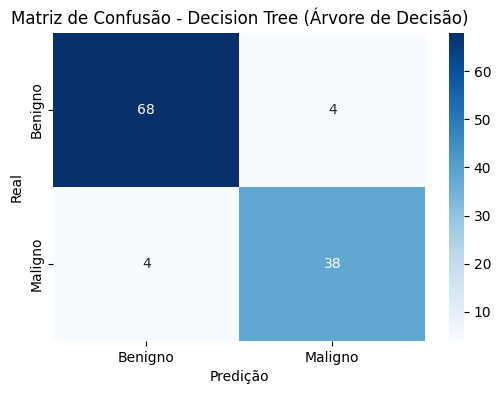

--------------------------------------------------



In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carregando os dados
# URL para o conjunto de dados raw do repositório UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Nomes das colunas (obtidos da documentação do dataset)
# O dataset tem 32 colunas: 1 ID, 1 Diagnóstico, 30 para features
col_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
             'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
             'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
             'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
             'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
             'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Carregamos o CSV informando que não há cabeçalho (header=None) e atribuímos os nomes corretos
df = pd.read_csv(url, header=None, names=col_names)

# 3. Pré-processamento dos dados
# Removemos a coluna 'id', que não é útil para o modelo
df = df.drop(columns=['id'])

# Transformamos a coluna 'diagnosis' (M=Maligno, B=Benigno) em uma coluna numérica 'target' (1=Maligno, 0=Benigno)
df['target'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Removemos a coluna original 'diagnosis', pois já temos a 'target'
df = df.drop(columns=['diagnosis'])

# 4. Separando Features (X) e Alvo (y)
# X contém todas as colunas, exceto a 'target'
X = df.drop(columns=['target'])
# y contém apenas a coluna 'target'
y = df['target']

# 5. Padronizando as Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Divisão em Conjuntos de Treino e Teste
# 80% para treino, 20% para teste. 'stratify=y' garante que a proporção de alvos seja a mesma nos dois conjuntos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 7. Função para treinar e avaliar modelos
# Para não repetir código, criamos uma função que faz o treino, a predição e mostra os resultados
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    print(f"--- Avaliando Modelo: {model_name} ---")

    # Treina o modelo
    model.fit(X_train, y_train)

    # Faz as predições
    y_pred = model.predict(X_test)

    # Calcula e imprime a acurácia
    acc = accuracy_score(y_test, y_pred)
    print(f"Acurácia: {acc:.4f}\n")

    # Imprime o relatório de classificação (precisão, recall, f1-score)
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=["Benigno","Maligno"]))

    # Plota a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benigno","Maligno"], yticklabels=["Benigno","Maligno"])
    plt.xlabel("Predição")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.show()
    print("-" * 50 + "\n")

# --- Executando os Modelos ---

# 8. Random Forest
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
train_and_evaluate(rf_clf, X_train, y_train, X_test, y_test, "Random Forest")

# 9. Support Vector Machine (SVM)
svm_clf = SVC(kernel='linear', random_state=42) # Usando um kernel linear como exemplo
train_and_evaluate(svm_clf, X_train, y_train, X_test, y_test, "SVM (Support Vector Machine)")

# 10. Decision Tree (Árvore de Decisão)
dt_clf = DecisionTreeClassifier(random_state=42)
train_and_evaluate(dt_clf, X_train, y_train, X_test, y_test, "Decision Tree (Árvore de Decisão)")

Dimensão: (178, 14)


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      Class0       1.00      1.00      1.00        12
      Class1       1.00      1.00      1.00        14
      Class2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



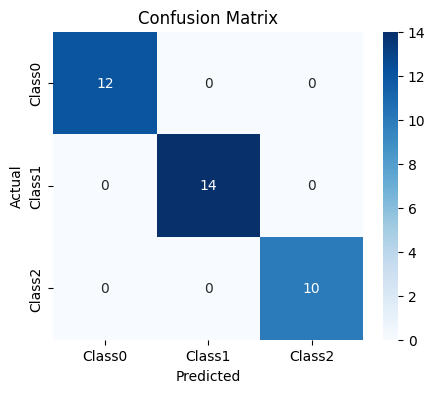


Feature importances:


,feature,importance
0,Color_intensity,0.187404
1,Flavanoids,0.168373
2,Proline,0.157024
3,Alcohol,0.108171
4,Hue,0.094966
5,OD280_OD315,0.089898
6,Total_phenols,0.051274
7,Magnesium,0.035210
8,Malic_acid,0.030246
9,Proanthocyanins,0.028266


In [4]:
# Wine dataset (UCI) - Colab
# Link público (raw UCI): https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar CSV (sem header no arquivo original)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# Colunas conforme a descrição do UCI
cols = ["Class","Alcohol","Malic_acid","Ash","Alcalinity_of_ash","Magnesium",
        "Total_phenols","Flavanoids","Nonflavanoid_phenols","Proanthocyanins",
        "Color_intensity","Hue","OD280_OD315","Proline"]

df = pd.read_csv(url, header=None, names=cols)

# Dimensões e primeiras linhas
print("Dimensão:", df.shape)
display(df.head())

# Separar features e target
X = df.drop(columns=["Class"])
y = df["Class"] - 1  # opcional: converter classes 1,2,3 -> 0,1,2

# Padronizar features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Treinar classificador
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# Prever e avaliar
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Class0","Class1","Class2"]))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class0","Class1","Class2"], yticklabels=["Class0","Class1","Class2"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Importância das features (top 10)
feat_names = X.columns
importances = clf.feature_importances_
imp_df = pd.DataFrame({"feature": feat_names, "importance": importances}).sort_values("importance", ascending=False)
print("\nFeature importances:")
display(imp_df.reset_index(drop=True))
